1. Dataset

* Use LAB 27 dataset, specifically the "Heart.csv" file.

2. Splitting the Data:

Experiment with two different data splits:
* 80-20 split
* 70-30 split

3. Naive Bayes and Logistic Regression:

* Perform **Gaussian Naive Bayes** on the dataset for both the 80-20 and 70-30 splits.
* Perform **Logistic Regression** on the dataset for both the 80-20 and 70-30 splits.

4. Benchmarking:

Compare and benchmark the performance of the two classification models (Logistic Regression and Gaussian Naive Bayes).

5. Fill in this sheet.

[BENCHMARKING LOGISTIC REGRESSION AND GAUSSIAN NAIVE BAYES MODELS FOR HEART DISEASE PREDICTION](https://docs.google.com/spreadsheets/d/1lLt7kKFi2D5NkxO-eiq2bvkV7607CIOlJWN_7GGSywo/edit#gid=2017879404)

6. Decision Making:
Based on the performance metrics obtained from benchmarking the two classification models (Logistic Regression and Gaussian Naive Bayes) with both 80-20 and 70-30 splits, determine which model and data split combination seems to be the most effective for the given dataset.

###1. Dataset

Upload data saved from Lab 27 processed_heart.csv

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create a DataFrame
df = pd.read_csv('processed_heart.csv')

In [ ]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2,0
1,2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,3,1
299,300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,3,1
300,301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,3,1
301,302,57,0,4,130,236,0,2,174,0,0.0,2,1.0,1,1


###2. Splitting the Data:

Features and Target from Lab 27 and Experiment with two different data splits:

80/20 split

70/30 split

In [ ]:
X = df.drop(columns=['Unnamed: 0', 'AHD'])
y = df['AHD']

In [ ]:
def split_data(X, y, test_size):
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# Example usage:
# Perform 80/20 split
X_train_80, X_test_80, y_train_80, y_test_80 = split_data(X, y, 0.2)

# Perform 70/30 split
X_train_70, X_test_70, y_train_70, y_test_70 = split_data(X, y, 0.3)

print('80/20 split train shape:', X_train_80.shape)
print('70/30 split train shape:', X_train_70.shape)


80/20 split train shape: (242, 13)
70/30 split train shape: (212, 13)


Feature Scaling

In [ ]:
def split_and_scale_data(X, y, test_size):
    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42)

    # Initialize the scaler
    scaler = StandardScaler()

    # Fit on training data and transform
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform testing data
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Perform 80/20 split and scale
X_train_80_scaled, X_test_80_scaled, y_train_80, y_test_80 = split_and_scale_data(X, y, 0.2)

# Perform 70/30 split and scale
X_train_70_scaled, X_test_70_scaled, y_train_70, y_test_70 = split_and_scale_data(X, y, 0.3)

print('80/20 split train shape:', X_train_80_scaled.shape)
print('80/20 train scaled:', X_train_80_scaled)

print('70/30 split train shape:', X_train_70_scaled.shape)
print('70/30 train scaled:', X_train_70_scaled)


80/20 split train shape: (242, 13)
80/20 train scaled: [[-2.83850353  0.72250438  1.65027399 ... -0.96343165 -0.71586852
  -0.84923193]
 [ 0.24135234  0.72250438  0.51571062 ... -0.96343165  0.40181007
   1.25860528]
 [ 1.56129057  0.72250438 -1.75341612 ...  0.65566876  0.40181007
  -0.84923193]
 ...
 [ 0.46134205  0.72250438 -0.61885275 ... -0.96343165  0.40181007
   1.25860528]
 [ 0.68133175  0.72250438 -0.61885275 ... -0.96343165  0.40181007
   1.25860528]
 [ 0.24135234 -1.38407465 -0.61885275 ... -0.96343165  0.40181007
  -0.84923193]]
70/30 split train shape: (212, 13)
70/30 train scaled: [[ 1.12414392  0.71713717 -1.74896356 ...  0.64109419  0.39712818
  -0.84963241]
 [ 0.79633304  0.71713717 -0.60103701 ...  0.64109419  1.50490678
   1.25705848]
 [ 0.24998157  0.71713717  0.54688954 ... -0.95787015 -0.71065043
  -0.84963241]
 ...
 [ 0.46852216  0.71713717 -0.60103701 ... -0.95787015  0.39712818
   1.25705848]
 [ 0.68706275  0.71713717 -0.60103701 ... -0.95787015  0.39712818
   

##**3a. Perform Logistic Regression on the dataset for both the 80/20 and 70/30 splits.**

Training

For 80/20 split

In [ ]:
# Fit the model on the scaled training data (80/20 split)
model = LogisticRegression()
model.fit(X_train_80_scaled, y_train_80)


LogisticRegression()

In [ ]:
# Predictions for training set (80/20 split)
y_pred_train_80 = model.predict(X_train_80_scaled)
y_pred_train_80

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

For 70/30 split

In [ ]:
# Fit the model on the scaled training data (70/30 split)
model.fit(X_train_70_scaled, y_train_70)


LogisticRegression()

In [ ]:
y_pred_train_70 = model.predict(X_train_70_scaled)
y_pred_train_70

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0])

Testing our trained model to new and unseen data.

For 80/20

In [ ]:
y_pred_test_80 = model.predict(X_test_80_scaled)
y_pred_test_80

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

For 70/30

In [ ]:
y_pred_test_70 = model.predict(X_test_70_scaled)
y_pred_test_70

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1])

Model Evaluation

Training evaluation:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate model performance on training data (80/20 split)
accuracy_train_80 = accuracy_score(y_train_80, y_pred_train_80)
precision_train_80 = precision_score(y_train_80, y_pred_train_80)
recall_train_80 = recall_score(y_train_80, y_pred_train_80)
f1_train_80 = f1_score(y_train_80, y_pred_train_80)
cm_train_80 = confusion_matrix(y_train_80, y_pred_train_80)
report_train_80 = classification_report(y_train_80, y_pred_train_80)

# Print evaluation metrics for training data (80/20 split)
print("Evaluation metrics for training data (80-20 split):")
print(f"Accuracy: {accuracy_train_80:.4f}")
print(f"Precision: {precision_train_80:.4f}")
print(f"Recall: {recall_train_80:.4f}")
print(f"F1-score: {f1_train_80:.4f}")
print("Confusion Matrix:")
print(cm_train_80)
print("Classification Report:")
print(report_train_80)
# Training predictions for 70/30 split
y_pred_train_70 = model.predict(X_train_70_scaled)

# Evaluate model performance on training data (70/30 split)
accuracy_train_70 = accuracy_score(y_train_70, y_pred_train_70)
precision_train_70 = precision_score(y_train_70, y_pred_train_70)
recall_train_70 = recall_score(y_train_70, y_pred_train_70)
f1_train_70 = f1_score(y_train_70, y_pred_train_70)
cm_train_70 = confusion_matrix(y_train_70, y_pred_train_70)
report_train_70 = classification_report(y_train_70, y_pred_train_70)

# Print evaluation metrics for training data (70/30 split)
print("\nEvaluation metrics for training data (70-30 split):")
print(f"Accuracy: {accuracy_train_70:.4f}")
print(f"Precision: {precision_train_70:.4f}")
print(f"Recall: {recall_train_70:.4f}")
print(f"F1-score: {f1_train_70:.4f}")
print("Confusion Matrix:")
print(cm_train_70)
print("Classification Report:")
print(report_train_70)

Evaluation metrics for training data (80-20 split):
Accuracy: 0.8512
Precision: 0.8660
Recall: 0.7850
F1-score: 0.8235
Confusion Matrix:
[[122  13]
 [ 23  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       135
           1       0.87      0.79      0.82       107

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242


Evaluation metrics for training data (70-30 split):
Accuracy: 0.8538
Precision: 0.8736
Recall: 0.7917
F1-score: 0.8306
Confusion Matrix:
[[105  11]
 [ 20  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       116
           1       0.87      0.79      0.83        96

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.85 

**Training Data 80/20 split:**

Accuracy: 0.8512<br>
Precision: 0.8660<br>
Recall: 0.7850<br>
F1-score: 0.8235<br>
Confusion Matrix: [[122, 13], [23, 84]]

**Training Data 70/30 split:**

Accuracy: 0.8538<br>
Precision: 0.8736<br>
Recall: 0.7917<br>
F1-score: 0.8306<br>
Confusion Matrix: [[105, 11], [20, 76]]

Test evaluation

In [ ]:
# Evaluate model performance on 80/20 split
accuracy_80 = accuracy_score(y_test_80, y_pred_test_80)
precision_80 = precision_score(y_test_80, y_pred_test_80)
recall_80 = recall_score(y_test_80, y_pred_test_80)
f1_80 = f1_score(y_test_80, y_pred_test_80)
cm_80 = confusion_matrix(y_test_80, y_pred_test_80)
report_80 = classification_report(y_test_80, y_pred_test_80)

# Print evaluation metrics for 80/20 split
print("Evaluation metrics for 80-20 split:")
print(f"Accuracy: {accuracy_80:.4f}")
print(f"Precision: {precision_80:.4f}")
print(f"Recall: {recall_80:.4f}")
print(f"F1-score: {f1_80:.4f}")
print("Confusion Matrix:")
print(cm_80)
print("Classification Report:")
print(report_80)

# Evaluate model performance on 70/30 split
accuracy_70 = accuracy_score(y_test_70, y_pred_test_70)
precision_70 = precision_score(y_test_70, y_pred_test_70)
recall_70 = recall_score(y_test_70, y_pred_test_70)
f1_70 = f1_score(y_test_70, y_pred_test_70)
cm_70 = confusion_matrix(y_test_70, y_pred_test_70)
report_70 = classification_report(y_test_70, y_pred_test_70)

# Print evaluation metrics for 70/30 split
print("\nEvaluation metrics for 70-30 split:")
print(f"Accuracy: {accuracy_70:.4f}")
print(f"Precision: {precision_70:.4f}")
print(f"Recall: {recall_70:.4f}")
print(f"F1-score: {f1_70:.4f}")
print()
print("Confusion Matrix:")
print(cm_70)
print()
print("Classification Report:")
print(report_70)


Evaluation metrics for 80-20 split:
Accuracy: 0.8852
Precision: 0.9032
Recall: 0.8750
F1-score: 0.8889
Confusion Matrix:
[[26  3]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61


Evaluation metrics for 70-30 split:
Accuracy: 0.8242
Precision: 0.7872
Recall: 0.8605
F1-score: 0.8222

Confusion Matrix:
[[38 10]
 [ 6 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.79      0.86      0.82        43

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



**Summary of 80/20 split:**

Accuracy: 88.52% The proportion of correctly predicted outcomes (true positives and true negatives).

Precision: 90.32% The proportion of true positive predictions (patients with heart disease) out of all the positive predictions made. It is correct 90.32% of the time.

Recall: 87.50% The proportion of true positive predictions out of all actual positive instances. The model correctly identifies 87.50% of all actual heart disease cases.

F-1 score: 88.89% harmonic mean of precision and recall.

It shows better generalization. The performance on the test set is close to or even slightly better than the training set, suggesting the model is not overfitting and generalizes well to unseen data.

**Summary of 70/30 split:**

Accuracy: 82.42% The proportion of correctly predicted outcomes (true positives and true negatives).

Precision: 78.72% The proportion of true positive predictions (patients with heart disease) out of all the positive predictions made. It is correct 78.72% of the time.

Recall: 86.05% The proportion of true positive predictions out of all actual positive instances. The model correctly identifies 86.05% of all actual heart disease cases.

F-1 score: 82.22% harmonic mean of precision and recall.

The 80/20 split overall shows higher accuracy and precision compared to the 70/30 split. It indicates the model performs slightly better with more data for training at 80% and less for testing at 20%.

The 70/30 split performs reasonably well. It suggests the model is robust across different data splits.

The higher performance metrics on the training set compared to the test set suggest that the model might be slightly overfitting. This means the model captures noise in the training data, which doesn't generalize well to the test data.


Visualize Confusion Matrix

In [ ]:
# Confusion matrix for 80/20 split
cm_80 = confusion_matrix(y_test_80, y_pred_test_80)

# Confusion matrix for 70/30 split
cm_70 = confusion_matrix(y_test_70, y_pred_test_70)


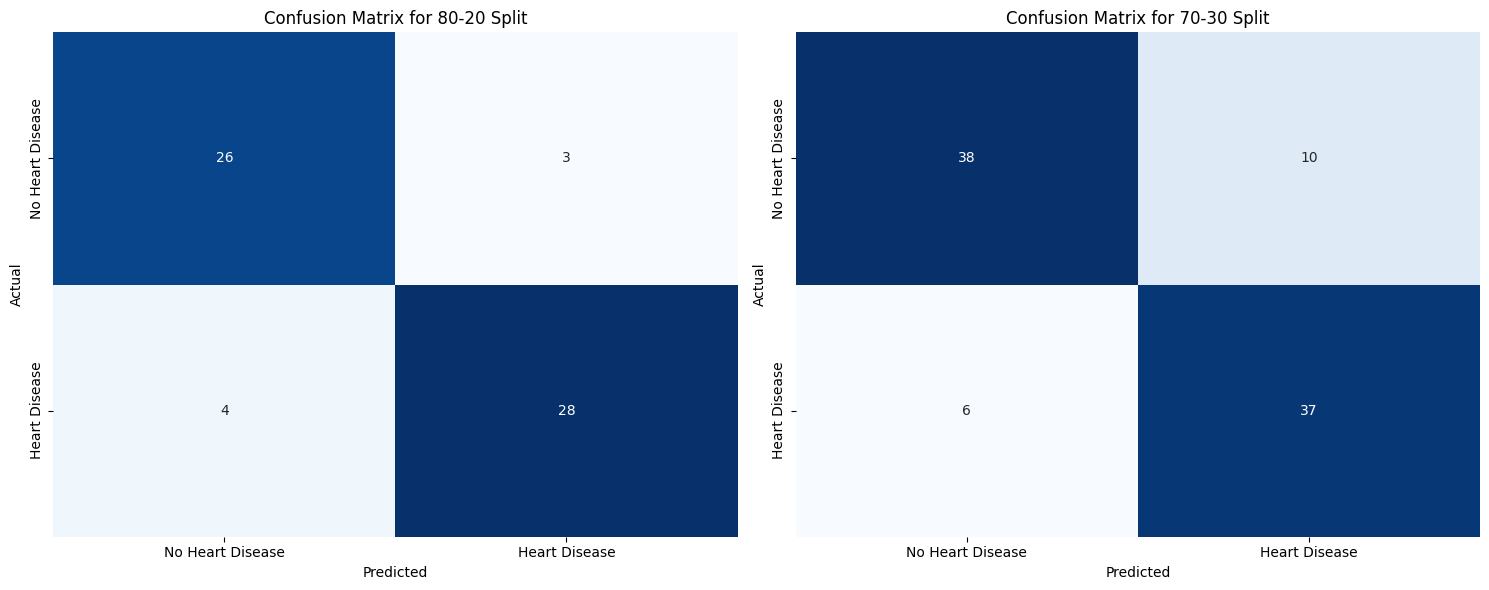

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 80/20 split
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix for 80-20 Split')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])
axes[0].yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])

# Plot for 70/30 split
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix for 70-30 Split')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])
axes[1].yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

**Matrix for 80/20 Split:**

True Positives (TP): 28 Bottom Right correctly predicted as heart disease.

True Negatives (TN): 26 Top Left correctly predicted as no heart disease.

False Positives (FP): 3 incorrectly predicted as heart disease.

False Negatives (FN): 4 incorrectly predicted as no heart disease.

**Matrix for 70/30 Split:**

True Positives (TP): 37 Bottom Right correctly predicted as heart disease.

True Negatives (TN): 38 Top Left correctly predicted as no heart disease.

False Positives (FP): 10 incorrectly predicted as heart disease.

False Negatives (FN): 6 incorrectly predicted as no heart disease.


Conclusion on the 80/20 versus 70/30:

The model trained and tested on the 80/20 split performs better overall. It has higher accuracy, precision, and F1-score, which suggests that it is more reliable in predicting heart disease in this dataset. The recall is slightly higher in the 70/30 split, but not enough to outweigh the advantages seen in other metrics for the 80/20 split.


##**3b. Perform Gaussian Naive Bayes on the dataset for both the 80/20 and 70/30 splits.**

Training

For 80/20 split.

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model on the scaled training data (80/20 split)
model.fit(X_train_80_scaled, y_train_80)


GaussianNB()

In [ ]:
# Predictions for training set (80/20 split)
y_pred_train_80 = model.predict(X_train_80_scaled)

y_pred_train_80

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

For 70/30 split.

In [ ]:
# Fit the model on the scaled training data (70/30 split)
model.fit(X_train_70_scaled, y_train_70)


GaussianNB()

In [ ]:
y_pred_train_70 = model.predict(X_train_70_scaled)
y_pred_train_70

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

Testing our trained model to new and unseen data.

For 80/20 split.

In [ ]:
y_pred_test_80 = model.predict(X_test_80_scaled)
y_pred_test_80

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

For 70/30 split.

In [ ]:
y_pred_test_70 = model.predict(X_test_70_scaled)
y_pred_test_70

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1])

Model Evaluation.

Training set.

In [ ]:
# Evaluate model performance on training data (80/20 split)
accuracy_train_80 = accuracy_score(y_train_80, y_pred_train_80)
precision_train_80 = precision_score(y_train_80, y_pred_train_80)
recall_train_80 = recall_score(y_train_80, y_pred_train_80)
f1_train_80 = f1_score(y_train_80, y_pred_train_80)
cm_train_80 = confusion_matrix(y_train_80, y_pred_train_80)
report_train_80 = classification_report(y_train_80, y_pred_train_80)

# Print evaluation metrics for training data (80/20 split)
print("Evaluation metrics for training data (80-20 split):")
print(f"Accuracy: {accuracy_train_80:.4f}")
print(f"Precision: {precision_train_80:.4f}")
print(f"Recall: {recall_train_80:.4f}")
print(f"F1-score: {f1_train_80:.4f}")
print("Confusion Matrix:")
print(cm_train_80)
print("Classification Report:")
print(report_train_80)
# Training predictions for 70/30 split
y_pred_train_70 = model.predict(X_train_70_scaled)

# Evaluate model performance on training data (70/30 split)
accuracy_train_70 = accuracy_score(y_train_70, y_pred_train_70)
precision_train_70 = precision_score(y_train_70, y_pred_train_70)
recall_train_70 = recall_score(y_train_70, y_pred_train_70)
f1_train_70 = f1_score(y_train_70, y_pred_train_70)
cm_train_70 = confusion_matrix(y_train_70, y_pred_train_70)
report_train_70 = classification_report(y_train_70, y_pred_train_70)

# Print evaluation metrics for training data (70/30 split)
print("\nEvaluation metrics for training data (70-30 split):")
print(f"Accuracy: {accuracy_train_70:.4f}")
print(f"Precision: {precision_train_70:.4f}")
print(f"Recall: {recall_train_70:.4f}")
print(f"F1-score: {f1_train_70:.4f}")
print("Confusion Matrix:")
print(cm_train_70)
print("Classification Report:")
print(report_train_70)


Evaluation metrics for training data (80-20 split):
Accuracy: 0.8264
Precision: 0.8037
Recall: 0.8037
F1-score: 0.8037
Confusion Matrix:
[[114  21]
 [ 21  86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.80      0.80      0.80       107

    accuracy                           0.83       242
   macro avg       0.82      0.82      0.82       242
weighted avg       0.83      0.83      0.83       242


Evaluation metrics for training data (70-30 split):
Accuracy: 0.8302
Precision: 0.8125
Recall: 0.8125
F1-score: 0.8125
Confusion Matrix:
[[98 18]
 [18 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       116
           1       0.81      0.81      0.81        96

    accuracy                           0.83       212
   macro avg       0.83      0.83      0.83       212
weighted avg       0.83      0.83     

**Training Data 80/20 split:**

Accuracy: 0.9274<br>
Precision: 0.8037<br>
Recall: 0.8037<br>
F1-score: 0.8037<br>
Confusion Matrix:[[114, 21], [21, 86]]<br>

**Training Data 70/30 split:**

Accuracy: 0.8302<br>
Precision: 0.8125<br>
Recall: 0.8125<br>
F1-score: 0.8125<br>
Confusion Matrix:[[98, 18], [18, 78]]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate model performance on 80/20 split
accuracy_80 = accuracy_score(y_test_80, y_pred_test_80)
precision_80 = precision_score(y_test_80, y_pred_test_80)
recall_80 = recall_score(y_test_80, y_pred_test_80)
f1_80 = f1_score(y_test_80, y_pred_test_80)
cm_80 = confusion_matrix(y_test_80, y_pred_test_80)
report_80 = classification_report(y_test_80, y_pred_test_80)

# Print evaluation metrics for 80/20 split
print("Evaluation metrics for 80-20 split:")
print(f"Accuracy: {accuracy_80:.4f}")
print(f"Precision: {precision_80:.4f}")
print(f"Recall: {recall_80:.4f}")
print(f"F1-score: {f1_80:.4f}")
print("Confusion Matrix:")
print(cm_80)
print("Classification Report:")
print(report_80)

# Evaluate model performance on 70/30 split
accuracy_70 = accuracy_score(y_test_70, y_pred_test_70)
precision_70 = precision_score(y_test_70, y_pred_test_70)
recall_70 = recall_score(y_test_70, y_pred_test_70)
f1_70 = f1_score(y_test_70, y_pred_test_70)
cm_70 = confusion_matrix(y_test_70, y_pred_test_70)
report_70 = classification_report(y_test_70, y_pred_test_70)

# Print evaluation metrics for 70/30 split
print("\nEvaluation metrics for 70-30 split:")
print(f"Accuracy: {accuracy_70:.4f}")
print(f"Precision: {precision_70:.4f}")
print(f"Recall: {recall_70:.4f}")
print(f"F1-score: {f1_70:.4f}")
print()
print("Confusion Matrix:")
print(cm_70)
print()
print("Classification Report:")
print(report_70)


Evaluation metrics for 80-20 split:
Accuracy: 0.8689
Precision: 0.9000
Recall: 0.8438
F1-score: 0.8710
Confusion Matrix:
[[26  3]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Evaluation metrics for 70-30 split:
Accuracy: 0.8022
Precision: 0.7660
Recall: 0.8372
F1-score: 0.8000

Confusion Matrix:
[[37 11]
 [ 7 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.77      0.84      0.80        43

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



**Summary of 80/20 split:**

Accuracy: 86.89% The proportion of correctly predicted outcomes (true positives and true negatives).

Precision: 90.00% The proportion of true positive predictions (patients with heart disease) out of all the positive predictions made. It is correct 90% of the time.

Recall: 84.38% The proportion of true positive predictions out of all actual positive instances. The model correctly identifies 84.38% of all actual heart disease cases.

F-1 score: 87.10% harmonic mean of precision and recall.

The model shows consistent performance between training and test sets, indicating good generalization without signs of overfitting.

**Summary of 70/30 split**:

Accuracy: 80.22% The proportion of corretly predicted outcomes (true positives and true negatives).

Precision: 76.6% The proportion of true positive predictions (patients with heart disease) out of all the positive predictions made. It is correct 76.6% of the time.

Recall: 83.72% The proportion of true positive predictions out of all actual positive instances. The model correctly identifies 83.72% of all actual heart disease cases.

F-1 score: 80% harmonic mean of precision and recall.

The 80/20 split overall shows higher accuracy and precision compared to the 70/30 split. It indicates the model performs slightly better with more data for training at 80% and less for testing at 20%.

The 70/30 split performs reasonably well. It suggests the model is robust across different data splits.

Similar performance metrics on both training and test sets suggest that the model generalizes well, with minimal signs of overfitting.

Visualize Confusion Matrix

In [ ]:
# Confusion matrix for 80/20 split
cm_80 = confusion_matrix(y_test_80, y_pred_test_80)

# Confusion matrix for 70/30 split
cm_70 = confusion_matrix(y_test_70, y_pred_test_70)

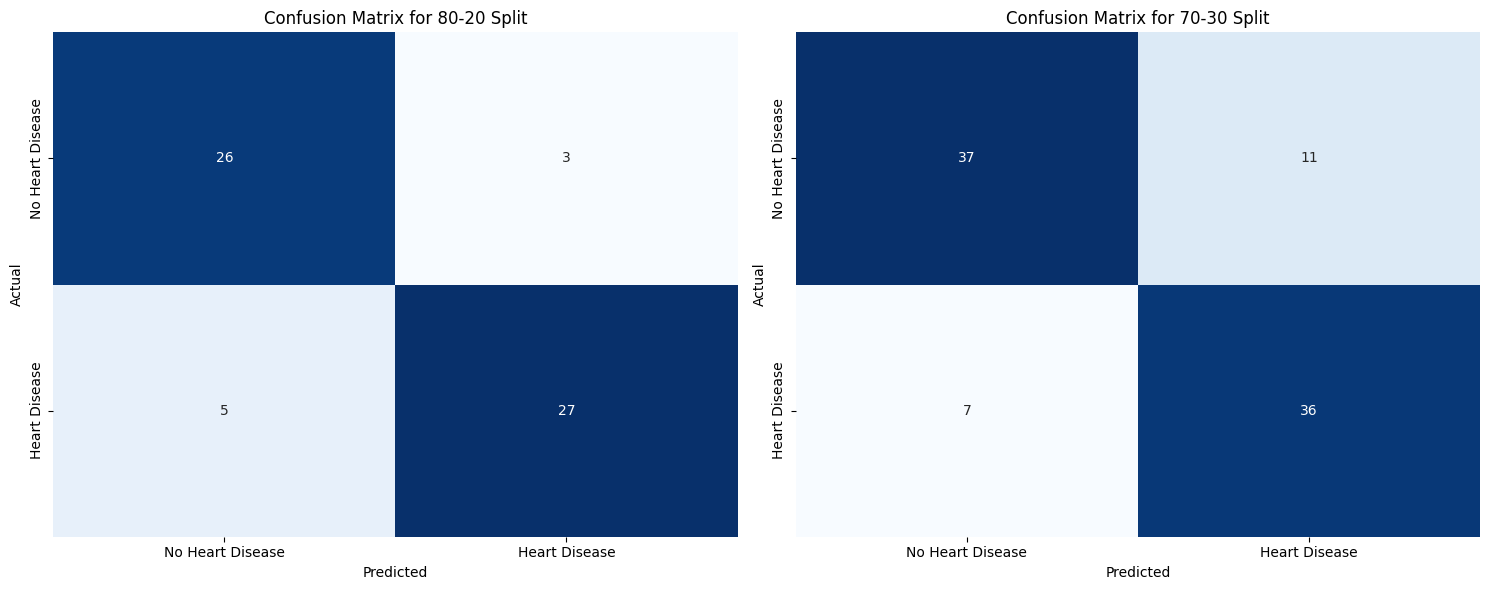

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for 80/20 split
sns.heatmap(cm_80, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix for 80-20 Split')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])
axes[0].yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])

# Plot for 70/30 split
sns.heatmap(cm_70, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix for 70-30 Split')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].xaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])
axes[1].yaxis.set_ticklabels(['No Heart Disease', 'Heart Disease'])

plt.tight_layout()
plt.show()

**Matrix for 80/20 Split:**

True Positives (TP): 27 Bottom Right correctly predicted as heart disease.

True Negatives (TN): 26 Top Left correctly predicted as no heart disease.

False Positives (FP): 3 incorrectly predicted as heart disease.

False Negatives (FN): 5 incorrectly predicted as no heart disease.

**Matrix for 70/30 Split**:

True Positives (TP): 36 Bottom Right correctly predicted as heart disease.

True Negatives (TN): 37 Top Left correctly predicted as no heart disease.

False Positives (FP): 11 incorrectly predicted as heart disease.

False Negatives (FN): 7 incorrectly predicted as no heart disease.

Conclusion on the 80/20 versus 70/30:

The model trained and tested on the 80/20 split performs better overall. It has higher accuracy, precision, recall and F1-score, which suggests that it is more reliable in predicting heart disease in this dataset.

##4. Benchmarking:

Compare and benchmark the performance of the two classification models (Logistic Regression and Gaussian Naive Bayes).

80/20 Split:

- Logistic Regression: Higher in all metrics, notably higher accuracy (0.8852) and F1-score (0.8889) compared to Gaussian Naive Bayes.
- Gaussian Naive Bayes: Slightly lower accuracy (0.8689) and F1-score (0.8710).

70/30 Split:

- Logistic Regression: Higher in all metrics, notably higher accuracy (0.8242) and F1-score (0.8222) compared to Gaussian Naive Bayes.
- Gaussian Naive Bayes: Lower accuracy (0.8022) and F1-score (0.8000).

Conclusion

Logistic Regression consistently outperforms Gaussian Naive Bayes in both the 80/20 and 70/30 splits, with higher accuracy and F1-scores.
    
Confusion Matrices and Classification Reports indicate better performance metrics for Logistic Regression.

Therefore, Logistic Regression appears to be the more effective model for predicting heart disease in this dataset based on the given metrics.

##5. Sheet filled out

for benchmarking Logistic Regression and Gaussian Naive Bayes Models for heart disease prediction.

<table border="1" cellpadding="5">
  <tr>
    <th rowspan="2"></th>
    <th colspan="4">80/20 Split</th>
    <th colspan="4">70/30 Split</th>
  </tr>
  <tr>
    <th colspan="2">Logistic Regression</th>
    <th colspan="2">Gaussian Naive Bayes</th>
    <th colspan="2">Logistic Regression</th>
    <th colspan="2">Gaussian Naive Bayes</th>
  </tr>
  <tr>
    <td>Metric</td>
    <td>Test</td>
    <td>Train</td>
    <td>Test</td>
    <td>Train</td>
    <td>Test</td>
    <td>Train</td>
    <td>Test</td>
    <td>Train</td>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>0.8852</td>
    <td>0.8512</td>
    <td>0.8689</td>
    <td>0.8264</td>
    <td>0.8242</td>
    <td>0.8538</td>
    <td>0.8022</td>
    <td>0.8302</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>0.9032</td>
    <td>0.8660</td>
    <td>0.9000</td>
    <td>0.8037</td>
    <td>0.7872</td>
    <td>0.8736</td>
    <td>0.7660</td>
    <td>0.8125</td>
  </tr>
  <tr>
    <td>Recall</td>
    <td>0.8750</td>
    <td>0.7850</td>
    <td>0.8438</td>
    <td>0.8037</td>
    <td>0.8605</td>
    <td>0.7917</td>
    <td>0.8372</td>
    <td>0.8125</td>
  </tr>
  <tr>
    <td>F1-score</td>
    <td>0.8889</td>
    <td>0.8235</td>
    <td>0.8710</td>
    <td>0.8037</td>
    <td>0.8222</td>
    <td>0.8306</td>
    <td>0.8000</td>
    <td>0.8125</td>
  </tr>
</table>


##6. Decision Making:

Based on the performance metrics obtained from benchmarking the two classification models (Logistic Regression and Gaussian Naive Bayes) with both 80/20 and 70/30 splits, determine which model and data split combination seems to be the most effective for the given dataset.

Based on the performance metrics obtained:

Logistic Regression generally performs better across both 80/20 and 70/30 splits compared to Gaussian Naive Bayes in terms of accuracy, precision, recall, and F1-score.

Specifically, the 80/20 split for Logistic Regression shows higher accuracy, precision, recall, and F1-score compared to both the 70/30 split of Logistic Regression and both splits of Gaussian Naive Bayes.

Therefore, the Logistic Regression model with the 80/20 split appears to be the most effective for the given dataset based on the benchmarked performance metrics.